In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)
from scipy import stats

In [2]:
df = pd.read_excel("Infant Child Data.xlsx",sheet_name="childbirth")

In [3]:
df.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTimePumpingLeftPumpingRight,Pumping Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,40.0,30.0,2015-08-05,20:31:47,5153.979
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,50.0,35.0,2015-08-05,23:33:46,33365.110
2,HPT2_NR_16,1,2015-08-06,10:20:00,916.0,2015-08-06,10:20:00,180.0,2015-08-06,10:20:00,NaN,NaN,2015-08-06,10:20:00,2100.000
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,NaN,NaN,2015-08-06,11:30:00,1200.000
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,NaN,NaN,2015-08-06,12:15:00,4800.000


In [4]:
df.shape

(1773, 15)

In [5]:
df.dtypes

BabyId                                        object
FirsttimeParent                                int64
Crying date                           datetime64[ns]
Crying time                                   object
Crying seconds                               float64
Feeding date                          datetime64[ns]
Feeding time                                  object
Bottle amount                                float64
PumpingDate                           datetime64[ns]
PumpingTimePumpingLeftPumpingRight            object
Pumping Left                                 float64
PumpingRight                                 float64
SleepingDate                          datetime64[ns]
SleepingTime                                  object
SleepingSecond                               float64
dtype: object

# Data Wrangling and Data Cleaning

## 1. ​Consider childbirth sheet and perform data cleaning technique by-

### 1. Handling NA values 

In [6]:
df.isna().sum()

BabyId                                   0
FirsttimeParent                          0
Crying date                              0
Crying time                              0
Crying seconds                        1700
Feeding date                             0
Feeding time                             0
Bottle amount                          729
PumpingDate                              0
PumpingTimePumpingLeftPumpingRight       0
Pumping Left                          1712
PumpingRight                          1705
SleepingDate                             0
SleepingTime                             0
SleepingSecond                         777
dtype: int64

In [7]:
print("NaN values:\n")
for i in df.columns:
    if df[i].isna().any():
        print(i + " - ", end="")
        nanperc = df[i].value_counts(dropna=False, normalize=True).values[0]
        print((nanperc * 100).round(2), end="%\n")

NaN values:

Crying seconds - 95.88%
Bottle amount - 41.12%
Pumping Left - 96.56%
PumpingRight - 96.16%
SleepingSecond - 43.82%


`Crying seconds`, `Pumping Left` and `PumpingRight` have more than 95% missing values. Ideally, they should be dropped. But because the further questions are based on them, I will just impute them with the average.

`Bottle amount` and `SleepingSecond` have slightly more than 40% missing values and hence, they too can be imputed with the mean.

In [8]:
df = df.fillna(df.mean())

### 2. Find the overall statistical information of the dataset. 

In [9]:
df.describe()

,FirsttimeParent,Crying seconds,Bottle amount,Pumping Left,PumpingRight,SleepingSecond
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000
mean,0.840948,1457.206747,127.203065,48.360656,38.014706,9896.331265
std,0.365828,415.045241,28.047172,7.838885,4.937932,6620.212145
min,0.000000,25.000000,20.000000,0.000000,0.000000,114.492500
25%,1.000000,1457.206747,120.000000,48.360656,38.014706,6600.000000
50%,1.000000,1457.206747,127.203065,48.360656,38.014706,9896.331265
75%,1.000000,1457.206747,130.000000,48.360656,38.014706,9896.331265
max,1.000000,12600.000000,210.000000,190.000000,155.000000,45000.000000


In [10]:
df.describe(include=['O'])

,BabyId,Crying time,Feeding time,PumpingTimePumpingLeftPumpingRight,SleepingTime
count,1773,1773,1773,1773,1773
unique,17,788,788,788,788
top,HPT2_NR_30,16:00:00,16:00:00,16:00:00,16:00:00
freq,199,23,23,23,23


### 3. Find the correlation between Crying seconds of babies, sleeping seconds 

In [11]:
corr = df[['Crying seconds','SleepingSecond']].corr()
corr

,Crying seconds,SleepingSecond
Crying seconds,1.000000,0.000817
SleepingSecond,0.000817,1.000000


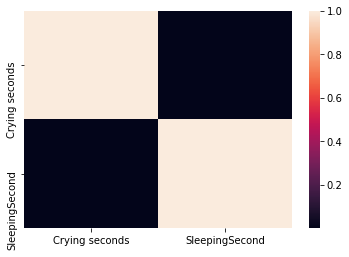

In [12]:
sns.heatmap(corr);

The correlation between `Crying seconds` and `SleepingSecond` is very weak, almost negligible.

### 4. Take any 2 babies’ data as a subset. Check whether that subset is deviating from the entire dataset. If it is deviating remove it from the dataframe

In [13]:
babyids = df.BabyId.unique()
babyids

array(['HPT2_NR_16', 'HPT2_NR_17', 'HPT2_NR_18', 'HPT2_NR_19',
       'HPT2_NR_20', 'HPT2_NR_21', 'HPT2_NR_22', 'HPT2_NR_23',
       'HPT2_NR_24', 'HPT2_NR_25', 'HPT2_NR_26', 'HPT2_NR_27',
       'HPT2_NR_28', 'HPT2_NR_29', 'HPT2_NR_30', 'HPT2_NR_31',
       'HPT2_NR_33'], dtype=object)

In [14]:
baby2 = np.random.choice(babyids, 2)
baby2

array(['HPT2_NR_28', 'HPT2_NR_31'], dtype=object)

In [15]:
baby2df = pd.DataFrame(columns=df.columns)
for i in baby2:
    baby2df = baby2df.append(df[df.BabyId == i])

In [16]:
baby2df.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTimePumpingLeftPumpingRight,Pumping Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond
1134,HPT2_NR_28,1,2015-07-22,10:45:00,1457.206747,2015-07-22,10:45:00,127.203065,2015-07-22,10:45:00,80.0,60.0,2015-07-22,10:45:00,5100.000
1135,HPT2_NR_28,1,2015-07-22,13:45:00,1457.206747,2015-07-22,13:45:00,127.203065,2015-07-22,13:45:00,80.0,60.0,2015-07-22,13:45:00,3598.958
1136,HPT2_NR_28,1,2015-07-22,14:36:30,1457.206747,2015-07-22,14:36:30,127.203065,2015-07-22,14:36:30,95.0,15.0,2015-07-22,14:36:30,3974.000
1137,HPT2_NR_28,1,2015-07-22,19:32:15,1457.206747,2015-07-22,19:32:15,127.203065,2015-07-22,19:32:15,140.0,60.0,2015-07-22,19:32:15,9562.014
1138,HPT2_NR_28,1,2015-07-22,21:47:42,1457.206747,2015-07-22,21:47:42,127.203065,2015-07-22,21:47:42,190.0,40.0,2015-07-22,21:47:42,9894.855


In [17]:
baby2df.describe()

,Crying seconds,Bottle amount,Pumping Left,PumpingRight,SleepingSecond
count,276.000000,276.000000,276.000000,276.000000,276.000000
mean,1554.283094,113.181534,51.076859,38.771313,9472.758999
std,676.018714,15.365828,16.032856,4.879962,2132.906450
min,900.000000,25.000000,48.360656,15.000000,2138.800000
25%,1457.206747,100.000000,48.360656,38.014706,9000.000000
50%,1457.206747,115.000000,48.360656,38.014706,9896.331265
75%,1457.206747,127.203065,48.360656,38.014706,9896.331265
max,8040.000000,150.000000,190.000000,75.000000,18960.000000


In [18]:
df.describe()

,FirsttimeParent,Crying seconds,Bottle amount,Pumping Left,PumpingRight,SleepingSecond
count,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000,1773.000000
mean,0.840948,1457.206747,127.203065,48.360656,38.014706,9896.331265
std,0.365828,415.045241,28.047172,7.838885,4.937932,6620.212145
min,0.000000,25.000000,20.000000,0.000000,0.000000,114.492500
25%,1.000000,1457.206747,120.000000,48.360656,38.014706,6600.000000
50%,1.000000,1457.206747,127.203065,48.360656,38.014706,9896.331265
75%,1.000000,1457.206747,130.000000,48.360656,38.014706,9896.331265
max,1.000000,12600.000000,210.000000,190.000000,155.000000,45000.000000


There is extremely minor deviation in the main dataset and the chosen subset. Hence, it will not be dropped.

### 5. Perform any other technique to clean data.

For starters, the column name `PumpingTimePumpingLeftPumpingRight` seems to be mixed up with other column names. It should be fixed to `PumpingTime`.

In [19]:
df.rename(columns = {'PumpingTimePumpingLeftPumpingRight':'PumpingTime'}, inplace=True)

# Data Analysis & Visualization 

## 2.​ Plot the following plots-

### 1. Take 5 babies into consideration and draw a bar chart to know crying data on different days. 

In [20]:
baby5 = np.random.choice(babyids, 5)
baby5

array(['HPT2_NR_16', 'HPT2_NR_19', 'HPT2_NR_19', 'HPT2_NR_23',
       'HPT2_NR_25'], dtype=object)

In [21]:
baby5df = pd.DataFrame(columns=df.columns)
for i in baby5:
    baby5df = baby5df.append(df[df.BabyId == i])

In [22]:
baby5df.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTime,Pumping Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,40.000000,30.000000,2015-08-05,20:31:47,5153.979
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,50.000000,35.000000,2015-08-05,23:33:46,33365.110
2,HPT2_NR_16,1,2015-08-06,10:20:00,916.0,2015-08-06,10:20:00,180.0,2015-08-06,10:20:00,48.360656,38.014706,2015-08-06,10:20:00,2100.000
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,48.360656,38.014706,2015-08-06,11:30:00,1200.000
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,48.360656,38.014706,2015-08-06,12:15:00,4800.000


In [23]:
baby5df['CryingDay'] = baby5df['Crying date'].dt.dayofweek

In [24]:
baby5df.replace({'CryingDay': {0:'Monday',1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}}, inplace=True)

In [25]:
baby5df.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTime,Pumping Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond,CryingDay
0,HPT2_NR_16,1,2015-08-05,20:31:47,900.0,2015-08-05,20:31:47,180.0,2015-08-05,20:31:47,40.000000,30.000000,2015-08-05,20:31:47,5153.979,Wednesday
1,HPT2_NR_16,1,2015-08-05,23:33:46,600.0,2015-08-05,23:33:46,180.0,2015-08-05,23:33:46,50.000000,35.000000,2015-08-05,23:33:46,33365.110,Wednesday
2,HPT2_NR_16,1,2015-08-06,10:20:00,916.0,2015-08-06,10:20:00,180.0,2015-08-06,10:20:00,48.360656,38.014706,2015-08-06,10:20:00,2100.000,Thursday
3,HPT2_NR_16,1,2015-08-06,11:30:00,300.0,2015-08-06,11:30:00,35.0,2015-08-06,11:30:00,48.360656,38.014706,2015-08-06,11:30:00,1200.000,Thursday
4,HPT2_NR_16,1,2015-08-06,12:15:00,600.0,2015-08-06,12:15:00,180.0,2015-08-06,12:15:00,48.360656,38.014706,2015-08-06,12:15:00,4800.000,Thursday


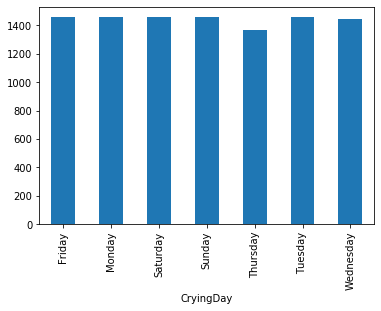

In [26]:
baby5df.groupby('CryingDay').mean()['Crying seconds'].plot(kind='bar'); #By average

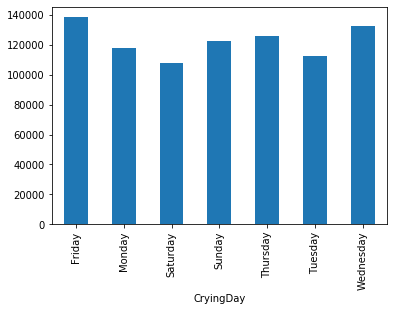

In [27]:
baby5df.groupby('CryingDay').sum()['Crying seconds'].plot(kind='bar'); #By sum

### 2. Consider Pumping data (Pumping left, Pumping right column) and feeding data(Bottle amount column). Draw Bar chart to find out any relationship between them by taking any 4 babies. 

In [28]:
baby4 = np.random.choice(babyids, 4)
baby4

array(['HPT2_NR_20', 'HPT2_NR_22', 'HPT2_NR_28', 'HPT2_NR_17'],
      dtype=object)

In [29]:
baby4df = pd.DataFrame(columns=df.columns)
for i in baby4:
    baby4df = baby4df.append(df[df.BabyId == i])

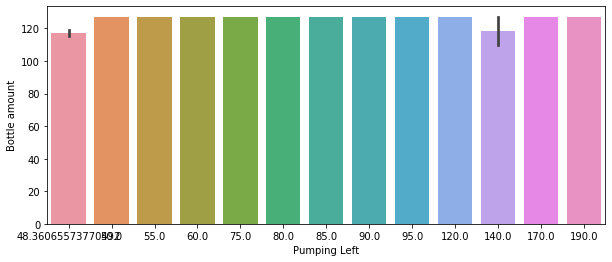

In [30]:
plt.figure(figsize=(10,4))
sns.barplot(x=baby4df['Pumping Left'],y=baby4df['Bottle amount']);

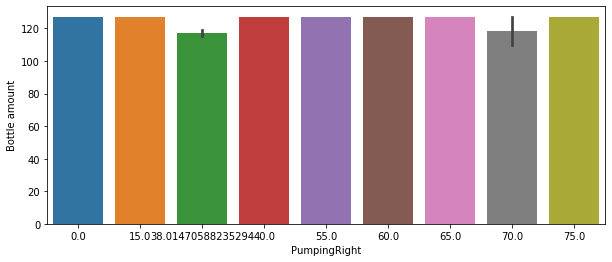

In [31]:
plt.figure(figsize=(10,4))
sns.barplot(x=baby4df['PumpingRight'],y=baby4df['Bottle amount']);

In [32]:
baby4df['PumpingData'] = baby4df['Pumping Left'] + baby4df['PumpingRight']

In [33]:
baby4df.head()

,BabyId,FirsttimeParent,Crying date,Crying time,Crying seconds,Feeding date,Feeding time,Bottle amount,PumpingDate,PumpingTime,Pumping Left,PumpingRight,SleepingDate,SleepingTime,SleepingSecond,PumpingData
365,HPT2_NR_20,1,2015-08-05,16:00:21,1080.000000,2015-08-05,16:00:21,70.0,2015-08-05,16:00:21,48.360656,38.014706,2015-08-05,16:00:21,10800.0,86.375362
366,HPT2_NR_20,1,2015-08-05,19:30:00,1457.206747,2015-08-05,19:30:00,90.0,2015-08-05,19:30:00,48.360656,38.014706,2015-08-05,19:30:00,10800.0,86.375362
367,HPT2_NR_20,1,2015-08-05,23:20:00,1457.206747,2015-08-05,23:20:00,90.0,2015-08-05,23:20:00,48.360656,38.014706,2015-08-05,23:20:00,12900.0,86.375362
368,HPT2_NR_20,1,2015-08-06,02:15:00,1457.206747,2015-08-06,02:15:00,90.0,2015-08-06,02:15:00,48.360656,38.014706,2015-08-06,02:15:00,9300.0,86.375362
369,HPT2_NR_20,1,2015-08-06,05:00:00,1457.206747,2015-08-06,05:00:00,90.0,2015-08-06,05:00:00,48.360656,38.014706,2015-08-06,05:00:00,8700.0,86.375362


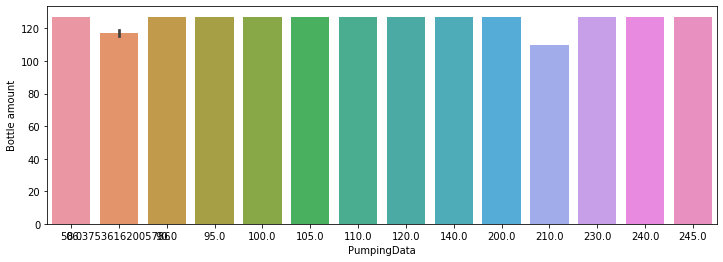

In [34]:
plt.figure(figsize=(12,4))
sns.barplot(x=baby4df.PumpingData, y=baby4df['Bottle amount']);

From the barplots, there does not seem to be any relationship that stands out between `Pumping Left`, `Pumping Right`, `Bottle amount` or the newly created variable `PumpingData`.

### 3. Find outliers by drawing a Scatter plot. If there are any, remove it from the dataframe. 

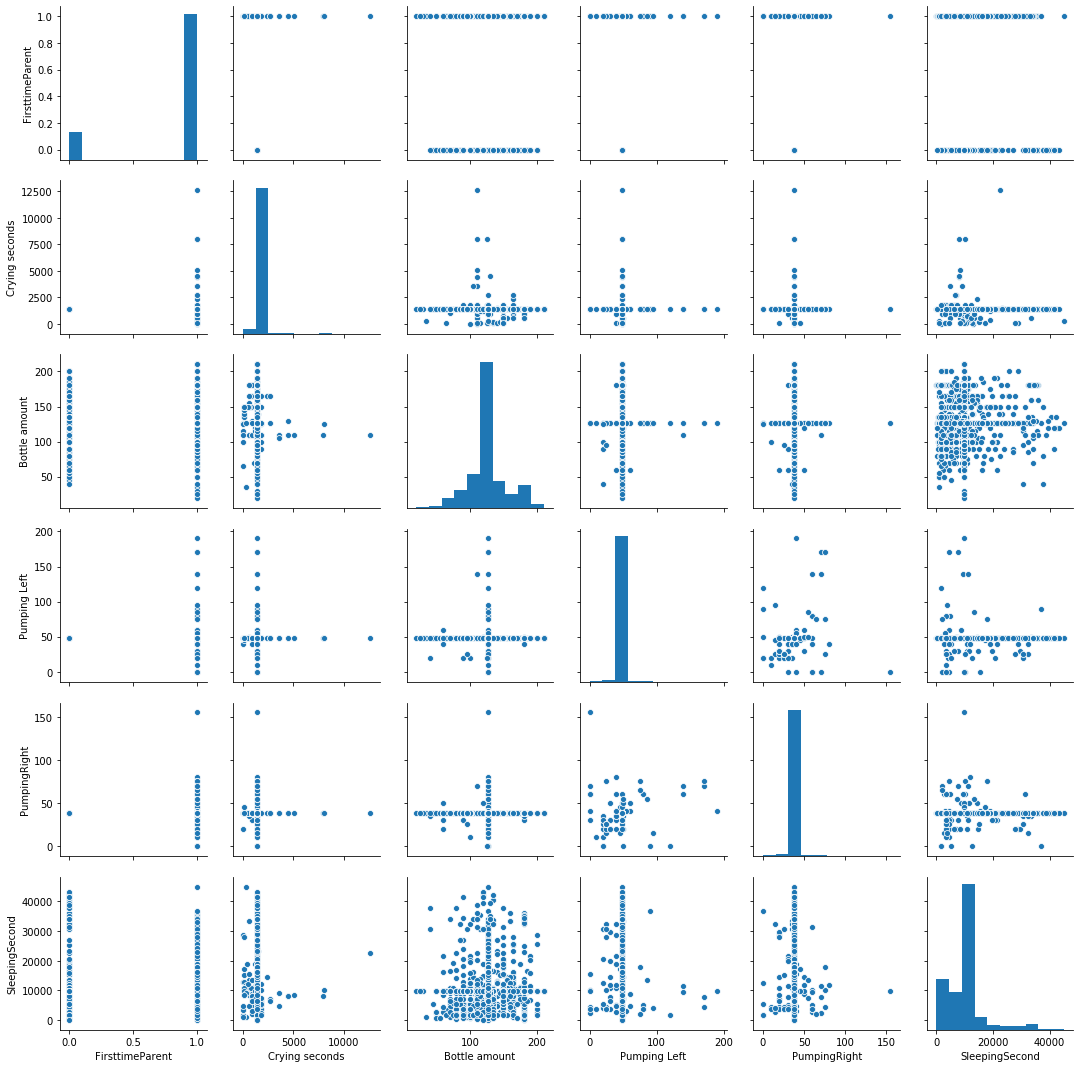

In [35]:
sns.pairplot(df);

In [36]:
numdf = df.select_dtypes(include=np.number)

In [37]:
numdf.shape

(1773, 6)

In [38]:
z = np.abs(stats.zscore(numdf))

In [39]:
numdf = numdf[(z <3).all(axis=1)]

In [40]:
numdf.shape

(1642, 6)

## 3.​ Find out the following findings from the data 

### 1. Find out which baby has cried the most and least. 

In [41]:
df[['BabyId','Crying seconds']].groupby('BabyId').sum()

,Crying seconds
BabyId,
HPT2_NR_16,128635.780205
HPT2_NR_17,36430.168664
HPT2_NR_18,139847.712740
HPT2_NR_19,230418.665959
HPT2_NR_20,247347.940171
HPT2_NR_21,224409.838973
HPT2_NR_22,106376.092500
HPT2_NR_23,84517.991301
HPT2_NR_24,121528.252466


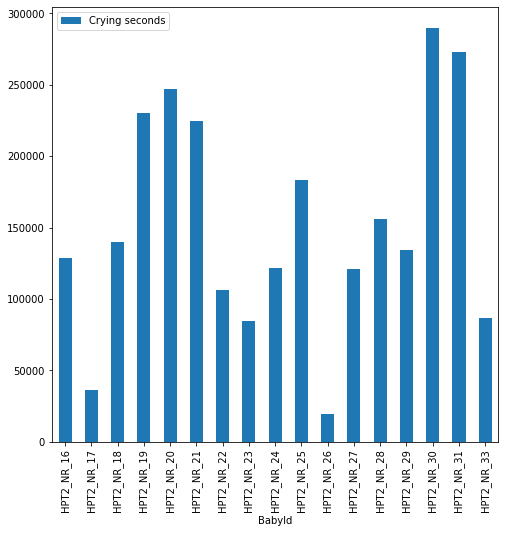

In [42]:
df[['BabyId','Crying seconds']].groupby('BabyId').sum().plot(kind='bar', figsize=(8,8));

The baby `HPT2_NR_30` has cried the <b>most</b>. (289984 seconds)

The baby `HPT2_NR_26` has cried the <b>least</b>. (19243 seconds)

### 2. Find out which baby has drank the most amount of milk and which baby the least.

In [43]:
df[['BabyId','Bottle amount']].groupby('BabyId').sum()

,Bottle amount
BabyId,
HPT2_NR_16,14933.467433
HPT2_NR_17,3126.858238
HPT2_NR_18,12691.436782
HPT2_NR_19,18456.992337
HPT2_NR_20,18665.000000
HPT2_NR_21,19766.226054
HPT2_NR_22,8773.793103
HPT2_NR_23,7330.574713
HPT2_NR_24,10005.000000


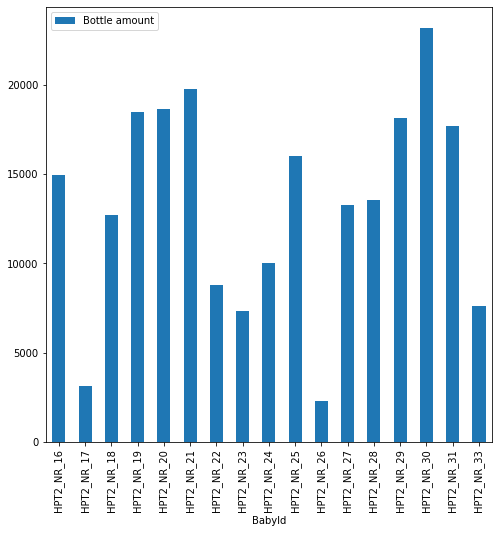

In [44]:
df[['BabyId','Bottle amount']].groupby('BabyId').sum().plot(kind='bar',figsize=(8,8));

The baby `HPT2_NR_30` had the <b>most</b> amount of milk. (23200)

Both the babies `HPT2_NR_25` and `HPT2_NR_33` had the <b>least</b> amount of milk. (0)

### 3. Check how many first time pregnancies are there. 

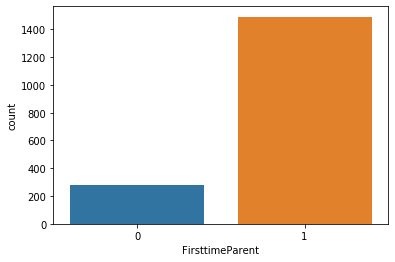

In [45]:
sns.countplot(df.FirsttimeParent);

In [46]:
df.FirsttimeParent.value_counts()

1    1491
0     282
Name: FirsttimeParent, dtype: int64

In [47]:
df.FirsttimeParent.value_counts(normalize=True)

1    0.840948
0    0.159052
Name: FirsttimeParent, dtype: float64

There have been <b>1491</b> first time pregnancies, <b>84%</b> of total pregnancies.

<br>

<br>

<br>

# Machine Learning Modeling

## 4.​ Consider the birth sheet file 

### 1. Build a regressor model to find the relation between Mom_weight as an independent variable and Baby_Birth_Weight as the target variable. Also, an appropriate plot depicting their relation and find the intercept of the model. Make a train test split of 80:20(train:test) 

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [49]:
df2 = pd.read_excel("Infant Child Data.xlsx", sheet_name="birth")

In [50]:
df2.head()

,Mom_weight,Mom_height,Mom_Age,Religion,Baby_Gender,Baby_Birth_Weight
0,41,152,25,1,1,2.06
1,42,157,25,3,1,1.70
2,44,153,23,2,1,1.59
3,45,177,19,2,1,2.73
4,46,160,19,2,1,2.08


In [51]:
y = df2[['Baby_Birth_Weight']]

In [52]:
y.head()

,Baby_Birth_Weight
0,2.06
1,1.70
2,1.59
3,2.73
4,2.08


In [53]:
df2_train, df2_test, y_train, y_test = train_test_split(df2,y, test_size=0.2, random_state=100)

In [54]:
df2_train.shape, df2_test.shape, y_train.shape, y_test.shape

((151, 6), (38, 6), (151, 1), (38, 1))

In [55]:
X_train = df2_train[['Mom_weight']]
X_test = df2_test[['Mom_weight']]

In [56]:
reg = LinearRegression().fit(X_train,y_train)

In [57]:
reg.coef_, reg.intercept_

(array([[0.05037951]]), array([-0.34321539]))

Therefore, the equation formed is-

$Baby\_Birth\_Weight = 0.05*Mom\_weight - 0.34$

In [58]:
y_train_pred = reg.predict(X_train)

In [59]:
r2_score(y_train, y_train_pred)

0.6493019917648928

In [60]:
y_test_pred = reg.predict(X_test)

In [61]:
r2_score(y_test, y_test_pred)

0.6093472423452342

### 2. Build a Multi Regression Model for predicting target variable mom_age using all the other variables. Make a train test split of 80:20(train:test) 

In [62]:
y = df2[['Mom_Age']]

In [63]:
y.head()

,Mom_Age
0,25
1,25
2,23
3,19
4,19


In [64]:
df2_train, df2_test, y_train, y_test = train_test_split(df2,y, test_size=0.2, random_state=100)

In [65]:
X_train = df2_train[['Mom_weight', 'Mom_height', 'Religion', 'Baby_Gender','Baby_Birth_Weight']]
X_test = df2_test[['Mom_weight', 'Mom_height', 'Religion', 'Baby_Gender','Baby_Birth_Weight']]

In [66]:
df2_train.shape, df2_test.shape, y_train.shape, y_test.shape

((151, 6), (38, 6), (151, 1), (38, 1))

In [67]:
reg = LinearRegression().fit(X_train, y_train)

In [68]:
reg.coef_, reg.intercept_

(array([[ 0.07174517,  0.05228892, -0.50372646,  0.96018678, -0.33317146]]),
 array([10.30206997]))

Therefore, the equation formed is-

$Mom\_Age = 0.07*Mom\_weight + 0.05*Mom\_height - 0.5*Religion + 0.96*Baby\_Gender -0.33*Baby\_Birth\_Weight + 10.3$

In [69]:
y_train_pred = reg.predict(X_train)

In [70]:
r2_score(y_train, y_train_pred)

0.031245741793108683

In [71]:
y_test_pred = reg.predict(X_test)

In [72]:
r2_score(y_test, y_test_pred)

-0.11253467249724003

### 3. Measure the performance of the MLR model on the following metrics:
1. Accuracy 
2. Misclassification Rate/ Error 
3. Precision & Recall 
4. R2 score 
5. Draw the Confusion matrix 

In [74]:
r2_score(y_test, y_test_pred)

-0.11253467249724003

In [75]:
mean_absolute_error(y_test, y_test_pred)

4.642641256313187

In [76]:
mean_squared_error(y_test, y_test_pred)

30.439842365438686